In [18]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from tensorflow.keras.utils import load_img, img_to_array

import os
from PIL import Image, ImageEnhance

from decimal import Decimal

https://keras.io/api/preprocessing/image/

In [2]:
train_data_dir = r'./dataset/images'

img_height = 128
img_width = 128

batch_size = 8
epochs = 5

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation') # set as validation data

Found 12800 images belonging to 8 classes.
Found 3200 images belonging to 8 classes.


### Modèle VGG16

In [5]:
labels = train_generator.class_indices
n_class = len(train_generator.class_indices)

In [6]:
from keras.applications.vgg16 import VGG16

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False) 
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

model = Sequential()
model.add(base_model) # Ajout du modèle VGG16
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(n_class, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

Epoch 1/5


<ipython-input-7-091f111a2407>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1600/1600 [==============================] - 84s 50ms/step - loss: 0.4011 - acc: 0.8654 - val_loss: 0.0259 - val_acc: 0.9978
Epoch 2/5
1600/1600 [==============================] - 80s 50ms/step - loss: 0.1680 - acc: 0.9468 - val_loss: 0.0140 - val_acc: 0.9987
Epoch 3/5
1600/1600 [==============================] - 81s 50ms/step - loss: 0.1367 - acc: 0.9548 - val_loss: 0.0352 - val_acc: 0.9981
Epoch 4/5
1600/1600 [==============================] - 81s 51ms/step - loss: 0.1060 - acc: 0.9670 - val_loss: 0.0097 - val_acc: 0.9978
Epoch 5/5
1600/1600 [==============================] - 81s 50ms/step - loss: 0.1098 - acc: 0.9655 - val_loss: 0.0105 - val_acc: 0.9981


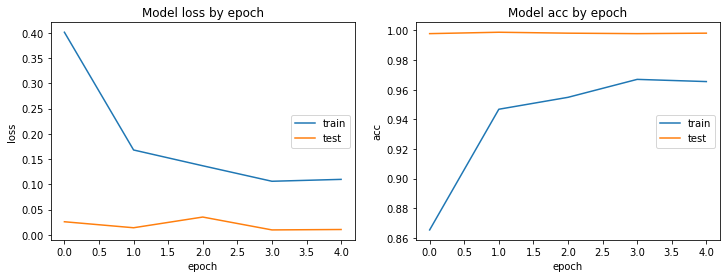

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

### Prédictions

In [9]:
def load_image(img_path, width = 128, height = 128, show=False, brightness=1, color=1, contrast=1):

    img = load_img(img_path, target_size=(width, height)) #  image.load_img
    
    # https://fr.acervolima.com/amelioration-de-l-image-dans-pil/
    img = ImageEnhance.Brightness(img).enhance(brightness)
    img = ImageEnhance.Color(img).enhance(color)
    img = ImageEnhance.Contrast(img).enhance(contrast)
    
    img_tensor = img_to_array(img)                    # image. (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [10]:
labels

{'blue': 0,
 'brown': 1,
 'green': 2,
 'orange': 3,
 'pink': 4,
 'purple': 5,
 'red': 6,
 'yellow': 7}

------------------------------------------------------------------------------------------------------
dominik-lange-Lej_oqHljbk-unsplash.jpg


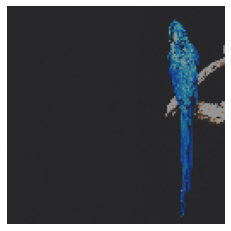

1/1 [==============================] - 0s 24ms/step
        indice       pred
brown        1  94.807327
orange       3   3.114366
green        2   1.493640
yellow       7   0.575578
blue         0   0.004692
------------------------------------------------------------------------------------------------------
fernando_20211129_19_36_15_Pro.jpg


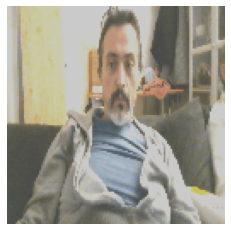

1/1 [==============================] - 0s 24ms/step
        indice       pred
brown        1  99.228798
orange       3   0.717404
red          6   0.040355
pink         4   0.013146
purple       5   0.000291
------------------------------------------------------------------------------------------------------
fernando_pochette_20211129_19_42_49_Pro.jpg


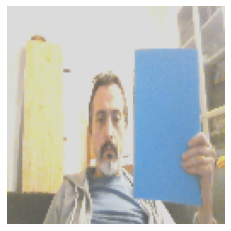

1/1 [==============================] - 0s 24ms/step
        indice       pred
blue         0  69.018471
purple       5  30.980305
brown        1   0.001046
yellow       7   0.000156
pink         4   0.000025
------------------------------------------------------------------------------------------------------
image1.jpg


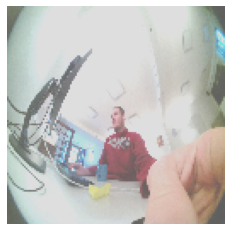

1/1 [==============================] - 0s 40ms/step
        indice       pred
blue         0  73.217194
green        2  15.808257
yellow       7  10.398562
purple       5   0.481647
brown        1   0.086611
------------------------------------------------------------------------------------------------------
image2.jpg


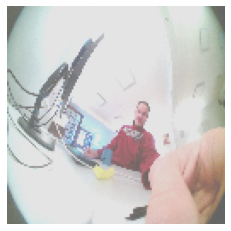

1/1 [==============================] - 0s 32ms/step
        indice       pred
purple       5  50.537121
blue         0  49.416172
yellow       7   0.024353
brown        1   0.017938
pink         4   0.003443
------------------------------------------------------------------------------------------------------
image3.jpg


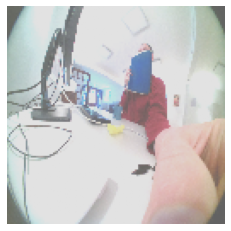

1/1 [==============================] - 0s 50ms/step
        indice       pred
blue         0  70.328751
yellow       7  23.679409
purple       5   5.517571
green        2   0.358753
pink         4   0.097876
------------------------------------------------------------------------------------------------------
IMG_annick.jpg


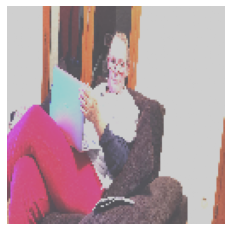

1/1 [==============================] - 0s 41ms/step
        indice       pred
brown        1  50.252419
blue         0  47.254604
purple       5   2.207011
yellow       7   0.234915
green        2   0.050977
------------------------------------------------------------------------------------------------------
IMG_mur_blanc.jpg


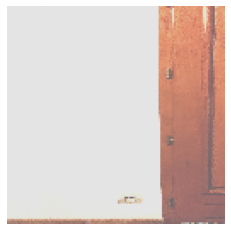

1/1 [==============================] - 0s 41ms/step
        indice       pred
pink         4  89.101395
purple       5   6.346846
yellow       7   2.332541
orange       3   1.838350
red          6   0.337675
------------------------------------------------------------------------------------------------------
IMG_mur_rouge.jpg


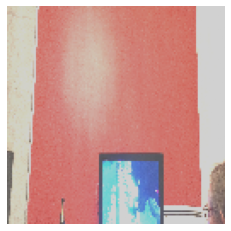

1/1 [==============================] - 0s 41ms/step
        indice          pred
blue         0  9.999483e+01
purple       5  5.179036e-03
yellow       7  2.329994e-08
green        2  4.651374e-09
pink         4  2.384239e-11
------------------------------------------------------------------------------------------------------
mathias-p-r-reding-P0YeIVOyvSI-unsplash.jpg


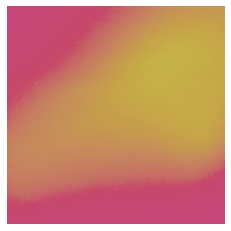

1/1 [==============================] - 0s 32ms/step
        indice       pred
brown        1  67.388031
red          6  31.462479
pink         4   0.595484
purple       5   0.535978
blue         0   0.012021
------------------------------------------------------------------------------------------------------
sam-dan-truong-ju2NgSoR6pA-unsplash.jpg


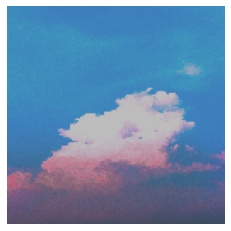

1/1 [==============================] - 0s 32ms/step
        indice          pred
blue         0  9.999985e+01
purple       5  1.599922e-04
yellow       7  5.256191e-14
brown        1  1.762633e-14
green        2  1.028193e-14
------------------------------------------------------------------------------------------------------
test.jpg


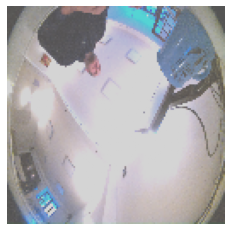

1/1 [==============================] - 0s 24ms/step
        indice       pred
blue         0  97.176727
brown        1   2.307301
purple       5   0.321024
green        2   0.108969
yellow       7   0.085967
------------------------------------------------------------------------------------------------------
test2.jpg


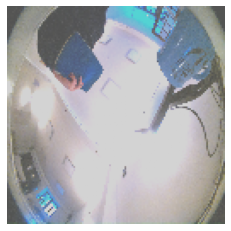

1/1 [==============================] - 0s 24ms/step
        indice       pred
blue         0  99.668175
green        2   0.329089
brown        1   0.001148
yellow       7   0.001021
purple       5   0.000556
------------------------------------------------------------------------------------------------------
test3.jpg


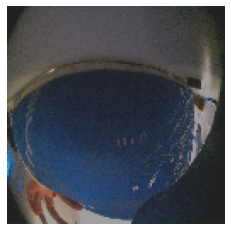

1/1 [==============================] - 0s 32ms/step
        indice       pred
blue         0  99.888405
purple       5   0.111477
green        2   0.000051
brown        1   0.000044
yellow       7   0.000032


In [36]:
images_to_predict_path = r"./predict/"
images_to_predict = os.listdir(images_to_predict_path) 

for image_test in images_to_predict:
    print('------------------------------------------------------------------------------------------------------')
    print(image_test)
    new_image = load_image(images_to_predict_path+image_test, show = True, brightness=2, color=1, contrast=0.5)
    pred = model.predict(new_image)
    
    df_predict = pd.DataFrame.from_dict(labels, orient='index')

    df_predict['pred'] = pred[0]*100
    df_predict.columns=['indice', 'pred']

    print(df_predict.sort_values(by='pred', ascending=False).head(5))